In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler

In [2]:
def change_bool(df):
    df = df.replace({False: 0, True: 1})
    return df

In [3]:
def change_dn(df):
    df = df.replace({'Day': 0, 'Night': 1})
    return df

In [4]:
df = pd.read_csv('ohe_data.csv')

In [5]:
df.set_index('Unnamed: 0',inplace=True)

In [6]:
X = df[['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Sunrise_Sunset','wc_clouds','wc_dust','wc_fair','wc_fog','wc_ice','wc_rain','wc_snow','wc_thunder','wc_wind','st_interstate','st_highway','st_other','State_AL','State_AR','State_AZ','State_CA','State_CO','State_CT','State_DC','State_DE','State_FL','State_GA','State_IA','State_ID','State_IL','State_IN','State_KS','State_KY','State_LA','State_MA','State_MD','State_ME','State_MI','State_MN','State_MO','State_MS','State_MT','State_NC','State_ND','State_NE','State_NH','State_NJ','State_NM','State_NV','State_NY','State_OH','State_OK','State_OR','State_PA','State_RI','State_SC','State_SD','State_TN','State_TX','State_UT','State_VA','State_VT','State_WA','State_WI','State_WV','State_WY','Side_L','Side_R','Timezone_US/Central','Timezone_US/Eastern','Timezone_US/Mountain','Timezone_US/Pacific','year_2016','year_2017','year_2018','year_2019','year_2020','year_2021','month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','hour_0','hour_1','hour_2','hour_3','hour_4','hour_5','hour_6','hour_7','hour_8','hour_9','hour_10','hour_11','hour_12','hour_13','hour_14','hour_15','hour_16','hour_17','hour_18','hour_19','hour_20','hour_21','hour_22','hour_23']]

In [7]:
X = change_dn(change_bool(X))

In [8]:
y = df['Severity']

In [9]:
oversample = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_over, y_over = oversample.fit_resample(X, y)

In [10]:
y_over.value_counts(normalize=True)

0    0.666667
1    0.333333
Name: Severity, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=42, stratify=y_over)

In [12]:
# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Insert model here...
# can we optimize anything here
from tensorflow.keras import Input

model = Sequential()

# input layer w/128 nodes
model.add(Input(shape=X.shape[1]))

# hidden w/ 100 nodes
model.add(Dense(100, activation='relu'))

# hidden w/ 50 nodes
model.add(Dense(50, activation='relu'))

# hidden w/ 10 nodes
model.add(Dense(10, activation='relu'))
# output
model.add(Dense(1, activation='sigmoid'))


# Compile it
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'], )

#Fit it
history = model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        verbose=1, 
        epochs=10
)

In [ ]:
model.save('model1')

In [11]:
model1 = keras.models.load_model('model1')

In [ ]:
ss= StandardScaler()
X = ss.fit_transform(X)

In [ ]:
y_pred = model1.predict(X)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
np.mean(y_pred)

In [ ]:
y.value_counts()

In [ ]:
sns.heatmap(confusion_matrix(y, y_pred,normalize='true'), annot=True)

In [ ]:

# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

In [14]:
# Insert model here...
# can we optimize anything here
from tensorflow.keras import Input

model2 = Sequential()

# input layer w/128 nodes
model2.add(Input(shape=X.shape[1]))

# hidden w/ 100 nodes
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.3))
# hidden w/ 50 nodes
model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.3))
# hidden w/ 10 nodes
model2.add(Dense(10, activation='relu'))
# output
model2.add(Dense(1, activation='sigmoid'))


# Compile it
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'], )

#Fit it
history2 = model2.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        verbose=1, 
        epochs=5
)

Epoch 1/5
86419/86419 [==============================] - 312s 4ms/step - loss: 0.3472 - acc: 0.8500 - val_loss: 0.3326 - val_acc: 0.8560
Epoch 2/5
86419/86419 [==============================] - 348s 4ms/step - loss: 0.3364 - acc: 0.8547 - val_loss: 0.3317 - val_acc: 0.8570
Epoch 3/5
86419/86419 [==============================] - 384s 4ms/step - loss: 0.3343 - acc: 0.8557 - val_loss: 0.3322 - val_acc: 0.8579
Epoch 4/5
86419/86419 [==============================] - 396s 5ms/step - loss: 0.3329 - acc: 0.8563 - val_loss: 0.3293 - val_acc: 0.8585
Epoch 5/5
86419/86419 [==============================] - 399s 5ms/step - loss: 0.3323 - acc: 0.8568 - val_loss: 0.3301 - val_acc: 0.8586


In [ ]:
# Visualize the loss
train_loss = history2.history['loss']
test_loss = history2.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

In [15]:
y_pred = model2.predict(X)

85346/85346 [==============================] - 94s 1ms/step


In [17]:
y_pred

array([[0.44037452],
       [0.9336162 ],
       [0.9284226 ],
       ...,
       [0.15525164],
       [0.21645571],
       [0.12551174]], dtype=float32)

In [26]:
len(y)

2731050

In [27]:
len(y_pred)

2731050

In [57]:
y_test = [0 if val <.1 else 1 for val in y_pred ] 

<AxesSubplot:>

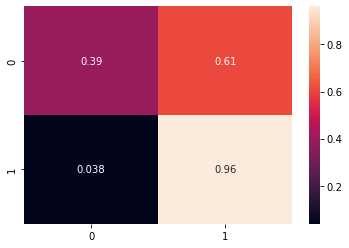

In [58]:
sns.heatmap(confusion_matrix(y, y_test,normalize='true'), annot=True)